Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

[0.2373046875, 0.0791015625, 0.0263671875, 0.0087890625, 0.0029296875]


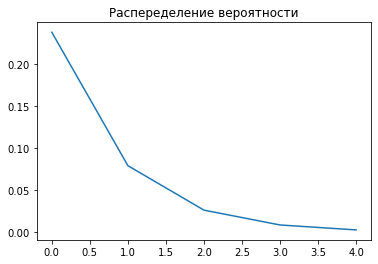

M(X) = 0.169921875, D(X) = f0.08724689483642578


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Ф-ия для расчета вероятности в зависиомти от количества верных ответов х
def Probdis(x):
    return ((1/4)**x)*((3/4)**(5-x))

a = []

for i in range(5):
    a.append(Probdis(i))
    
print(a)
plt.title('Распеределение вероятности')
plt.plot(a)
plt.show()

M = (np.array(a)*np.linspace(0, 4, 5)).sum()
D = ((np.array(a) - M)**2).sum()
print (f'M(X) = {M}, D(X) = f{D}')


Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [34]:
lambda_ = 10
p = 0.95

def poisson_proba(k: int) -> float:
    """Формула Пуассона.
    """
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

# for i in range(11):
#     print(i)
#     print(1 - poisson_proba(i))

# Рассчет вероятности и поиск N перебором

p2 = 1
n = 0
while 1 - poisson_proba(n) > p:
    n += 1
else:
    print(f'N = {n}')


N = 6


Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка. 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [35]:
p_1 = 0.01
P = 0.9
k = 6

# Формула Бернулли
def Bern(n, k, p_1):
    return (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k)))*(p_1**k)*((1-p_1)**(n-k))

# for i in range(6, 500, 100):
#     print(i)
#     print(Bern(i, k, p_1))
    
n = 6
summa = Bern(n, k, p_1)

while 1 - summa > P:
    n += 1
    summa += Bern(n, k, p_1)
else:
    print(f'Число выстрелов = {n}')

Число выстрелов = 154
